# Fraud Detection
## Rahnama College Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading dataset

In [3]:
# Read dataset from google drive
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Fraud.csv')
df.head(5)

,id,ProId,ProCreationTimestamp,CustId,CustCreationTimestamp,Rate,TaskCreationTimestamp,Price,ServiceId,CategoryId,ZoneId,TaskState,TargetProId,isFraud
0,VkSa32MyS738HMkfk4tEfk,vqUkxUDuEmB7gHWQvcYrBn,1552751751302,SgcxJApdnttAvEN9865TSZ,1565441404199,5,1565608270089,362000.0,bKv8JeCDhHBCe8SnfDcv66,VzkJEPR5H3mnqctJ8TW3YS,98DpwFpuLYJtF6jajghriE,Finished,vqUkxUDuEmB7gHWQvcYrBn,False
1,FDPHLhrcjx3Gww4syg43Po,KaLEhwzZxCQ7GjPmVwBVav,1558262535289,EveEDVPDDDq3Ljh3bg8Exn,1561655121208,5,1563280381472,NaN,aegfi8HeWASAP6a9YkddeL,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,YvvjyjpmXxj43RJGBHPq2n,False
2,6Z7CCQoHpC8ga8KZbsgUbx,pybDYgTiCUv3Pv3WLgxKCM,1558538960723,mrDLWRmWuxGD7TVPAsD5X6,1545554406049,1,1566297337468,NaN,uDHVz7XXXRCkGKWRUe2jKp,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
3,n5DKFF8SJYoP57ypvpCEg5,zqPiDV33KwrMBZoyeQXMJW,1507727811649,aK3MnLeQywfLYMJJNyu7i8,1512288789660,4,1522825078700,NaN,Jy7nZvUqvwDUhcAG59wPcg,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
4,oCwEhmYhhzHkuZyqQCusFU,CR8z3ThPyzBKXFqqzemQAS,1560860808052,vHjzucgXFu9eA9YhuEeuk4,1561328838459,1,1564542737897,150000.0,f8o6yBmfeJiUTAmvpRCFAZ,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False


In [4]:
df.shape

(24855, 14)

# Data cleaning

In [5]:
# remove spaces and tabs from the name of columns and all will be lowercase
print('original column names:')
print(list(df.columns))
df = df.rename(mapper=str.strip, axis='columns')
df = df.rename(mapper=str.lower, axis='columns')
print('changed column names:')
print(list(df.columns))

original column names:
['id', 'ProId', 'ProCreationTimestamp', 'CustId', 'CustCreationTimestamp', 'Rate', 'TaskCreationTimestamp', 'Price', 'ServiceId', 'CategoryId', 'ZoneId', 'TaskState', 'TargetProId', 'isFraud']
changed column names:
['id', 'proid', 'procreationtimestamp', 'custid', 'custcreationtimestamp', 'rate', 'taskcreationtimestamp', 'price', 'serviceid', 'categoryid', 'zoneid', 'taskstate', 'targetproid', 'isfraud']


## Remove undesired columns

In [6]:
# drop columns contains ID that are not important in our analysis
drop_cols = ['id', 'procreationtimestamp', 'custcreationtimestamp', 'serviceid', 'categoryid', 'zoneid']
df.drop(drop_cols, axis=1, inplace=True)
print(df.shape)
print(list(df.columns))

(24855, 8)
['proid', 'custid', 'rate', 'taskcreationtimestamp', 'price', 'taskstate', 'targetproid', 'isfraud']


In [7]:
df.head(5)

,proid,custid,rate,taskcreationtimestamp,price,taskstate,targetproid,isfraud
0,vqUkxUDuEmB7gHWQvcYrBn,SgcxJApdnttAvEN9865TSZ,5,1565608270089,362000.0,Finished,vqUkxUDuEmB7gHWQvcYrBn,False
1,KaLEhwzZxCQ7GjPmVwBVav,EveEDVPDDDq3Ljh3bg8Exn,5,1563280381472,NaN,Finished,YvvjyjpmXxj43RJGBHPq2n,False
2,pybDYgTiCUv3Pv3WLgxKCM,mrDLWRmWuxGD7TVPAsD5X6,1,1566297337468,NaN,Finished,NaN,False
3,zqPiDV33KwrMBZoyeQXMJW,aK3MnLeQywfLYMJJNyu7i8,4,1522825078700,NaN,Finished,NaN,False
4,CR8z3ThPyzBKXFqqzemQAS,vHjzucgXFu9eA9YhuEeuk4,1,1564542737897,150000.0,Finished,NaN,False


## Change categories to One Hot

In [8]:
# taskstate column checked to be sure it contains multiple unique values
# must check it before splitting because we don't know all possible values for this column
print(df['taskstate'].unique())

['Finished' 'Canceled' 'Waiting']


In [9]:
# One Hot Encoding
df = pd.get_dummies(df, columns=["taskstate"])
df.head(5)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting
0,vqUkxUDuEmB7gHWQvcYrBn,SgcxJApdnttAvEN9865TSZ,5,1565608270089,362000.0,vqUkxUDuEmB7gHWQvcYrBn,False,0,1,0
1,KaLEhwzZxCQ7GjPmVwBVav,EveEDVPDDDq3Ljh3bg8Exn,5,1563280381472,NaN,YvvjyjpmXxj43RJGBHPq2n,False,0,1,0
2,pybDYgTiCUv3Pv3WLgxKCM,mrDLWRmWuxGD7TVPAsD5X6,1,1566297337468,NaN,NaN,False,0,1,0
3,zqPiDV33KwrMBZoyeQXMJW,aK3MnLeQywfLYMJJNyu7i8,4,1522825078700,NaN,NaN,False,0,1,0
4,CR8z3ThPyzBKXFqqzemQAS,vHjzucgXFu9eA9YhuEeuk4,1,1564542737897,150000.0,NaN,False,0,1,0


## Create Training and Test Sets

In [10]:
# Split-out validation dataset
X = df[list(df.columns)]
X.drop(['isfraud'], axis=1, inplace=True)
y = df['isfraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=7)
# describes info about train and test set 
print("X_train dataset: ", X_train.shape) 
print("y_train dataset: ", y_train.shape) 
print("X_test dataset: ", X_test.shape) 
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (20878, 9)
y_train dataset:  (20878,)
X_test dataset:  (3977, 9)
y_test dataset:  (3977,)


## Handle Missing values

In [11]:
# Total number of empty cells in dataset
print('#missed values in train:', X_train.isnull().sum().sum())
print('#missed values in test:', X_test.isnull().sum().sum())

#missed values in train: 23736
#missed values in test: 4557


In [12]:
# Display total number of missing values for each column (sorted from highest to lowest one) in train set
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum() / X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent']) 
missing_data.T

,targetproid,price,taskstate_Waiting,taskstate_Finished,taskstate_Canceled,taskcreationtimestamp,rate,custid,proid
total,18753.000000,4983.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.898218,0.238672,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Display total number of missing values for each column (sorted from highest to lowest one) in test set
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum() / X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent']) 
missing_data.T

,targetproid,price,taskstate_Waiting,taskstate_Finished,taskstate_Canceled,taskcreationtimestamp,rate,custid,proid
total,3551.000000,1006.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.892884,0.252954,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# fill NAN prices in test and train sets with mean value of train set
X_train['price'].fillna(np.nanmean(X_train['price']), inplace = True)
X_test['price'].fillna(np.nanmean(X_train['price']), inplace = True)

# fill NAN targetproid with mean value
X_train['targetproid'].fillna('no one', inplace = True)
X_test['targetproid'].fillna('no one', inplace = True)

# check the result of filling missing values
print('#missed values in train:', X_train.isnull().sum().sum())
print('#missed values in test:', X_test.isnull().sum().sum())

#missed values in train: 0
#missed values in test: 0


In [15]:
list(X_train.columns)

['proid',
 'custid',
 'rate',
 'taskcreationtimestamp',
 'price',
 'targetproid',
 'taskstate_Canceled',
 'taskstate_Finished',
 'taskstate_Waiting']

# Feature extraction

## Two features related to rate

In [16]:
# extract some with rate feature
new_train = X_train[['proid', 'rate']].groupby('proid').mean()
new_train = new_train.rename(columns={'rate':'meanrate'})
X_train = pd.merge(X_train, new_train, how='right', on='proid')
X_train.head(10)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,meanrate
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,5,1572678404841,1.900000e+05,DRC94LCr8Xj7va34Y5JJ4K,0,1,0,5.000000
1,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,5,1566548764588,8.000000e+04,no one,0,1,0,5.000000
2,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548256635750,3.500000e+05,258pjAdXRonen93HG5M4ps,0,1,0,4.666667
3,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,4,1548943802257,5.081192e+05,no one,0,1,0,4.666667
4,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548259551065,4.000000e+05,258pjAdXRonen93HG5M4ps,0,1,0,4.666667
5,25nfdbp92SZceT4wG6ijxf,ArPgS78nmEycgaxR3LizWa,5,1570382804356,8.000000e+04,no one,0,1,0,5.000000
6,25pUfqByjyBRKBXP7XntqY,UXGXMuBc9bPJugSX5UgRaK,5,1567143807877,5.081192e+05,no one,0,1,0,5.000000
7,25wgFxg9Y2aiBJoB437M8Z,W4UuVs4eGraHA9h6W2scbp,2,1552947412955,6.000000e+06,no one,0,1,0,4.250000
8,25wgFxg9Y2aiBJoB437M8Z,gvEHgaQERL8c5Km8CizLmC,5,1561899335728,5.081192e+05,no one,0,1,0,4.250000
9,25wgFxg9Y2aiBJoB437M8Z,NMzUa4yGQWHT7LzR46LpTH,5,1561996096132,5.081192e+05,no one,0,1,0,4.250000


In [17]:
# do the same for test set using mean values in train set
X_test = pd.merge(X_test, new_train, how='left', on='proid')
X_test.head(10)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,meanrate
0,vqUkxUDuEmB7gHWQvcYrBn,YyAMjJFRCNCcF46Um5SQyb,5,1565463438669,120000.00000,no one,0,1,0,4.379310
1,q8yHdbLDLMfoyaMfHB3Ydi,ZHCyDiJqfDgahxFPix6Z5u,5,1546527734572,100000.00000,q8yHdbLDLMfoyaMfHB3Ydi,0,1,0,4.786408
2,ZeLWRtahRwJBpPZmiGeKQp,5bFMfZAxKtqRvHQ2dzecyX,5,1568932729911,550000.00000,no one,0,1,0,4.538462
3,sgALuBAkN9ge7H65AevYXj,AxpcsLPotirzNdcZU9Ui3y,5,1555668810760,160000.00000,no one,0,1,0,4.615385
4,kiTpRWuXyJbF8eQyjUbYyi,sQbhKCsgWmGon2CNrhL5Yk,1,1575028842745,508119.21598,2t437FqWbd2qFdV3BnfapK,0,1,0,4.500000
5,BbzzCuf82EKyvAftpguMjo,UvFu66iKPAFoG3fvVJ9HEj,5,1567664815380,508119.21598,no one,0,1,0,NaN
6,F2DjSC2jW7AuCd3EagyLbX,uQEYc7HpEaMeThQPNggGyY,5,1562104792288,508119.21598,no one,0,1,0,5.000000
7,hkCqsTSiQmMcWJEuHZPvQ3,quSV5KHEKnUEZbXreqN3n7,4,1557919032034,500000.00000,no one,0,1,0,NaN
8,DbaPb8dmSofK86WjUXRqen,pppXQLxFVPKz5iwGLocjEk,5,1535388989413,80000.00000,no one,0,1,0,2.000000
9,PYEBXyaModnVKSZAjuSLRy,9QU8MzfpXKnfp9qMzpKdm5,5,1565362693381,508119.21598,no one,0,1,0,4.666667


In [18]:
# Display total number of missing values for each column in test set
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum() / X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent']) 
missing_data.T

,meanrate,taskstate_Waiting,taskstate_Finished,taskstate_Canceled,targetproid,price,taskcreationtimestamp,rate,custid,proid
total,324.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.081468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is some pro in test set that they are not in train set and we don't have their average rate. Therefore, there is some NANs in 'meanrate' column in test set.

In [19]:
# handle NANs in meanrate column for test set
# It's reasonable to fill them with zero because these people didn't do any work before
X_test['meanrate'].fillna(0, inplace = True)

# check the result of filling missing values
print('#missed values in test:', X_test.isnull().sum().sum())

#missed values in test: 0


In [20]:
# get the difference of each rate with the mean rate of each pro in train set
X_train['diffmeanrate'] = X_train['rate'] - X_train['meanrate']
X_train.head(5)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,meanrate,diffmeanrate
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,5,1572678404841,190000.00000,DRC94LCr8Xj7va34Y5JJ4K,0,1,0,5.000000,0.000000
1,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,5,1566548764588,80000.00000,no one,0,1,0,5.000000,0.000000
2,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548256635750,350000.00000,258pjAdXRonen93HG5M4ps,0,1,0,4.666667,0.333333
3,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,4,1548943802257,508119.21598,no one,0,1,0,4.666667,-0.666667
4,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548259551065,400000.00000,258pjAdXRonen93HG5M4ps,0,1,0,4.666667,0.333333


In [21]:
# same work for test set
X_test['diffmeanrate'] = X_test['rate'] - X_test['meanrate']
X_test.head(5)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,meanrate,diffmeanrate
0,vqUkxUDuEmB7gHWQvcYrBn,YyAMjJFRCNCcF46Um5SQyb,5,1565463438669,120000.00000,no one,0,1,0,4.379310,0.620690
1,q8yHdbLDLMfoyaMfHB3Ydi,ZHCyDiJqfDgahxFPix6Z5u,5,1546527734572,100000.00000,q8yHdbLDLMfoyaMfHB3Ydi,0,1,0,4.786408,0.213592
2,ZeLWRtahRwJBpPZmiGeKQp,5bFMfZAxKtqRvHQ2dzecyX,5,1568932729911,550000.00000,no one,0,1,0,4.538462,0.461538
3,sgALuBAkN9ge7H65AevYXj,AxpcsLPotirzNdcZU9Ui3y,5,1555668810760,160000.00000,no one,0,1,0,4.615385,0.384615
4,kiTpRWuXyJbF8eQyjUbYyi,sQbhKCsgWmGon2CNrhL5Yk,1,1575028842745,508119.21598,2t437FqWbd2qFdV3BnfapK,0,1,0,4.500000,-3.500000


In [22]:
# change diffmeanrate and rate columns to categorical shape
# then drop all other columns that was related to rate in train set
X_train['highermeanrate'] = X_train['diffmeanrate'] > 0
X_train['highestrate'] = X_train['rate'] == 5
X_train.drop(['rate', 'diffmeanrate', 'meanrate'], axis=1, inplace=True)
X_train.head(5)

,proid,custid,taskcreationtimestamp,price,targetproid,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,1572678404841,190000.00000,DRC94LCr8Xj7va34Y5JJ4K,0,1,0,False,True
1,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,1566548764588,80000.00000,no one,0,1,0,False,True
2,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548256635750,350000.00000,258pjAdXRonen93HG5M4ps,0,1,0,True,True
3,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,1548943802257,508119.21598,no one,0,1,0,False,False
4,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548259551065,400000.00000,258pjAdXRonen93HG5M4ps,0,1,0,True,True


In [23]:
# do the same for test set
X_test['highermeanrate'] = X_test['diffmeanrate'] > 0
X_test['highestrate'] = X_test['rate'] == 5
X_test.drop(['rate', 'diffmeanrate', 'meanrate'], axis=1, inplace=True)
X_test.head(5)

,proid,custid,taskcreationtimestamp,price,targetproid,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate
0,vqUkxUDuEmB7gHWQvcYrBn,YyAMjJFRCNCcF46Um5SQyb,1565463438669,120000.00000,no one,0,1,0,True,True
1,q8yHdbLDLMfoyaMfHB3Ydi,ZHCyDiJqfDgahxFPix6Z5u,1546527734572,100000.00000,q8yHdbLDLMfoyaMfHB3Ydi,0,1,0,True,True
2,ZeLWRtahRwJBpPZmiGeKQp,5bFMfZAxKtqRvHQ2dzecyX,1568932729911,550000.00000,no one,0,1,0,True,True
3,sgALuBAkN9ge7H65AevYXj,AxpcsLPotirzNdcZU9Ui3y,1555668810760,160000.00000,no one,0,1,0,True,True
4,kiTpRWuXyJbF8eQyjUbYyi,sQbhKCsgWmGon2CNrhL5Yk,1575028842745,508119.21598,2t437FqWbd2qFdV3BnfapK,0,1,0,False,False


## A feature related to targetproid

In [24]:
# add new column to train set
X_train['frauddoubt'] = (X_train['proid'] == X_train['targetproid']) & X_train['highestrate']
X_train.drop('targetproid', axis=1, inplace=True)
X_train.head(5)

,proid,custid,taskcreationtimestamp,price,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate,frauddoubt
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,1572678404841,190000.00000,0,1,0,False,True,False
1,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,1566548764588,80000.00000,0,1,0,False,True,False
2,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548256635750,350000.00000,0,1,0,True,True,True
3,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,1548943802257,508119.21598,0,1,0,False,False,False
4,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548259551065,400000.00000,0,1,0,True,True,True


In [25]:
# the same for test set
X_test['frauddoubt'] = (X_test['proid'] == X_test['targetproid']) & X_test['highestrate']
X_test.drop('targetproid', axis=1, inplace=True)
X_test.head(5)

,proid,custid,taskcreationtimestamp,price,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate,frauddoubt
0,vqUkxUDuEmB7gHWQvcYrBn,YyAMjJFRCNCcF46Um5SQyb,1565463438669,120000.00000,0,1,0,True,True,False
1,q8yHdbLDLMfoyaMfHB3Ydi,ZHCyDiJqfDgahxFPix6Z5u,1546527734572,100000.00000,0,1,0,True,True,True
2,ZeLWRtahRwJBpPZmiGeKQp,5bFMfZAxKtqRvHQ2dzecyX,1568932729911,550000.00000,0,1,0,True,True,False
3,sgALuBAkN9ge7H65AevYXj,AxpcsLPotirzNdcZU9Ui3y,1555668810760,160000.00000,0,1,0,True,True,False
4,kiTpRWuXyJbF8eQyjUbYyi,sQbhKCsgWmGon2CNrhL5Yk,1575028842745,508119.21598,0,1,0,False,False,False


In [26]:
# no more need proid and custid so drop them from test and train set
X_train.drop(['proid', 'custid'], axis=1, inplace=True)
X_test.drop(['proid', 'custid'], axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(20878, 8)
(3977, 8)


,taskcreationtimestamp,price,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate,frauddoubt
0,1572678404841,190000.00000,0,1,0,False,True,False
1,1566548764588,80000.00000,0,1,0,False,True,False
2,1548256635750,350000.00000,0,1,0,True,True,True
3,1548943802257,508119.21598,0,1,0,False,False,False
4,1548259551065,400000.00000,0,1,0,True,True,True


# Normalizing data

In [27]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

# Classification

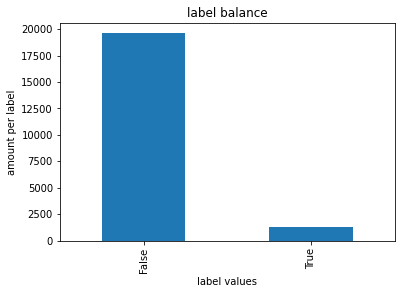

In [28]:
plt.title('label balance in train set')
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

It is clear that the dataset is not balanced.
So the train set must be balanced.

## Data balancing

In [29]:
# # apply near miss on train set
# from imblearn.under_sampling import NearMiss 
# nr = NearMiss() 
# X_train, y_train = nr.fit_sample(X_train, y_train.ravel()) 
# print("After Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("After Undersampling, counts of label '0': {}".format(sum(y_train == 0))) 

In [30]:
# apply Smote on train set to get balanced training set
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.07)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

SMOTE approach get us better results for accuracy. So use this and comment the nearmiss approach.

## Build models

### Dicision tree classifier

Evaluate the best weights to use class weight in Dicision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1000,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.511806 using {'class_weight': {0: 100, 1: 1}}
0.511806 (0.032085) with: {'class_weight': {0: 100, 1: 1}}
0.508086 (0.023149) with: {'class_weight': {0: 10, 1: 1}}
0.510824 (0.025814) with: {'class_weight': {0: 1000, 1: 1}}
0.504271 (0.024956) with: {'class_weight': {0: 1, 1: 10}}
0.508946 (0.021308) with: {'class_weight': {0: 1, 1: 100}}


In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight={0: 10, 1: 1})
clf.fit(X_train, y_train)
predictions = clf.predict(X_test) 
# print classification report 
print(classification_report(y_test, predictions)) 
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       False       0.93      0.48      0.63      3715
        True       0.06      0.49      0.11       262

    accuracy                           0.48      3977
   macro avg       0.50      0.49      0.37      3977
weighted avg       0.87      0.48      0.60      3977

0.4802615036459643


Test another classifier to check if there would be better results:

### Random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
# print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict)) 
print(accuracy_score(y_test, rfc_predict))
# print('F1 score:',f1_score(y_test, rfc_predict))

              precision    recall  f1-score   support

       False       0.93      0.52      0.67      3715
        True       0.07      0.47      0.11       262

    accuracy                           0.52      3977
   macro avg       0.50      0.50      0.39      3977
weighted avg       0.88      0.52      0.63      3977

0.5169725924063364
